In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

data = pd.read_csv('weighted_clustering_vectors.csv')
features = data.columns[3:]

x = data.loc[:, features].values

pca_2comps = PCA(n_components = 2)
principal_components = pca_2comps.fit_transform(x)

principal_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
principal_df

,PC1,PC2
0,0.446834,-0.023978
1,-0.131905,-0.947202
2,-0.507517,0.001420
3,-1.637697,2.956633
4,-0.062742,-0.225239
...,...,...
587,-1.103546,1.352946
588,-0.586664,1.309819
589,0.102540,-0.241687
590,1.729426,0.161876


# Test PCA Visualisation with AU3 Output

In [2]:
final_df = pd.concat([data[['metro_name', 'cbsa_id', 'au3']], principal_df], axis = 1)
final_df

,metro_name,cbsa_id,au3,PC1,PC2
0,"Aberdeen, WA",10140.0,0.375230,0.446834,-0.023978
1,"Ada, OK",10220.0,-1.589582,-0.131905,-0.947202
2,"Adrian, MI",10300.0,0.583803,-0.507517,0.001420
3,"Akron, OH",10420.0,0.255774,-1.637697,2.956633
4,"Albany, GA",10500.0,0.259028,-0.062742,-0.225239
...,...,...,...,...,...
587,"York-Hanover, PA",49620.0,0.454380,-1.103546,1.352946
588,"Youngstown-Warren-Boardman, OH-PA",49660.0,0.294844,-0.586664,1.309819
589,"Yuba City, CA",49700.0,1.016019,0.102540,-0.241687
590,"Yuma, AZ",49740.0,0.735752,1.729426,0.161876


In [3]:
import plotly.express as px 

fig = px.scatter_3d(final_df, x = 'PC1', y = 'PC2', z = 'au3', color = 'au3')
fig.show()

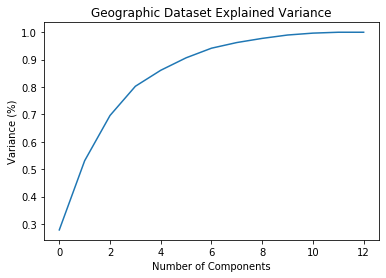

In [10]:
import matplotlib.pyplot as plt 

# Now, include the AU3 score
features2 = data.columns[2:]
x2 = data.loc[:, features2].values

pca = PCA().fit(x2) 

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component
plt.title('Geographic Dataset Explained Variance')
plt.show()

According this graph, we should use 10 components because the first 10 components explain ~100% of the variance in our data.

In [5]:
# Now use 10 components
pca_10comps = PCA(n_components = 10)
principal_components2 = pca_10comps.fit_transform(x2)

cols = ['PC' + str(i) for i in range(1, 11)]
principal_df2 = pd.DataFrame(data = principal_components2, columns = cols)
principal_df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-0.174570,0.584061,-0.270246,-1.029471,1.057876,0.412525,-0.029253,-0.056338,-0.033904,0.057074
1,1.578100,-0.965448,-0.232994,0.560019,0.025963,0.393959,0.035345,-0.055441,-0.002661,0.010926
2,-0.717990,-0.215223,-0.207053,-0.176573,0.149364,-0.339106,0.168094,-0.292162,0.088647,-0.090952
3,-1.922202,-0.715759,2.705366,0.870667,0.560872,0.043670,0.123232,-0.046629,-0.172884,-0.298670
4,-0.142139,-0.015721,-0.277512,0.085398,-0.713178,0.224227,0.541228,-0.503223,0.097229,0.121454
...,...,...,...,...,...,...,...,...,...,...
587,-1.302677,-0.517088,1.145304,0.972133,0.261227,-0.270784,0.093890,-0.079206,-0.109250,-0.151663
588,-0.936814,-0.121609,1.117292,-0.209910,0.048719,-0.325473,0.077578,-0.103965,0.109763,-0.181819
589,-0.752057,0.465676,-0.653730,0.186545,0.604608,0.900561,-0.033596,-0.073833,-0.028297,0.043710
590,0.124189,1.867567,-0.216319,-0.010513,-0.297263,0.587106,-0.232104,0.028682,0.076326,0.234219


# K-Means on New PCA DF (*AU3 Output Included)

In [6]:
from sklearn.cluster import KMeans

k = 6

kmeans = KMeans(n_clusters = k).fit(principal_df2)
principal_df2.loc[:,'cluster'] = kmeans.labels_
principal_df2 = principal_df2
principal_df2

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,cluster
0,-0.174570,0.584061,-0.270246,-1.029471,1.057876,0.412525,-0.029253,-0.056338,-0.033904,0.057074,0
1,1.578100,-0.965448,-0.232994,0.560019,0.025963,0.393959,0.035345,-0.055441,-0.002661,0.010926,2
2,-0.717990,-0.215223,-0.207053,-0.176573,0.149364,-0.339106,0.168094,-0.292162,0.088647,-0.090952,1
3,-1.922202,-0.715759,2.705366,0.870667,0.560872,0.043670,0.123232,-0.046629,-0.172884,-0.298670,5
4,-0.142139,-0.015721,-0.277512,0.085398,-0.713178,0.224227,0.541228,-0.503223,0.097229,0.121454,2
...,...,...,...,...,...,...,...,...,...,...,...
587,-1.302677,-0.517088,1.145304,0.972133,0.261227,-0.270784,0.093890,-0.079206,-0.109250,-0.151663,5
588,-0.936814,-0.121609,1.117292,-0.209910,0.048719,-0.325473,0.077578,-0.103965,0.109763,-0.181819,5
589,-0.752057,0.465676,-0.653730,0.186545,0.604608,0.900561,-0.033596,-0.073833,-0.028297,0.043710,0
590,0.124189,1.867567,-0.216319,-0.010513,-0.297263,0.587106,-0.232104,0.028682,0.076326,0.234219,0


In [7]:
# Get actual latitude and longitude values for visualisation, not the standardised ones
geo_coding = pd.read_csv('../geocoding_data/geocode_cbsa_crosswalk.csv')
geo_cluster_cbsa = data.merge(geo_coding, left_on = 'cbsa_id', right_on = 'CBSA', how = 'left').drop(columns = ['CBSA', 'Unnamed: 0']).drop_duplicates('cbsa_id')

geo_cluster_df = pd.DataFrame(list(zip(data['metro_name'], 
                                       geo_cluster_cbsa['Latitude'],
                                       geo_cluster_cbsa['Longitude'],
                                       data['au3'],
                                       principal_df2['cluster'])), 
                              columns = ['metro_name', 'latitude', 'longitude', 'au3', 'pca_cluster'])
geo_cluster_df

,metro_name,latitude,longitude,au3,pca_cluster
0,"Aberdeen, WA",46.972965,-123.81923,0.375230,0
1,"Ada, OK",34.780243,-96.68761,-1.589582,2
2,"Adrian, MI",42.164890,-83.78387,0.583803,1
3,"Akron, OH",41.321189,-81.50135,0.255774,5
4,"Albany, GA",31.580774,-84.16044,0.259028,2
...,...,...,...,...,...
587,"York-Hanover, PA",40.236139,-76.93084,0.454380,5
588,"Youngstown-Warren-Boardman, OH-PA",41.152347,-79.96320,0.294844,5
589,"Yuba City, CA",38.727451,-121.45433,1.016019,0
590,"Yuma, AZ",32.921712,-113.45703,0.735752,0


# Plot Clusters on US Map

## Clusters with AU3 Included

In [59]:
fig = px.scatter_mapbox(geo_cluster_df, lat="latitude", lon="longitude", hover_name="metro_name",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
#fig.update_layout(mapbox_style="open-street-map")
#fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [9]:
# Coordinates are not totally accurate
# Look for geographic clusters

fig = px.scatter_mapbox(geo_cluster_df, lat="latitude", lon="longitude", hover_name="metro_name", hover_data = ['pca_cluster', 'au3'],
                        color = 'pca_cluster', zoom=3, color_continuous_scale=px.colors.diverging.Portland, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


## Clusters without AU3

In [11]:
final_df

,metro_name,cbsa_id,au3,PC1,PC2
0,"Aberdeen, WA",10140.0,0.375230,0.446834,-0.023978
1,"Ada, OK",10220.0,-1.589582,-0.131905,-0.947202
2,"Adrian, MI",10300.0,0.583803,-0.507517,0.001420
3,"Akron, OH",10420.0,0.255774,-1.637697,2.956633
4,"Albany, GA",10500.0,0.259028,-0.062742,-0.225239
...,...,...,...,...,...
587,"York-Hanover, PA",49620.0,0.454380,-1.103546,1.352946
588,"Youngstown-Warren-Boardman, OH-PA",49660.0,0.294844,-0.586664,1.309819
589,"Yuba City, CA",49700.0,1.016019,0.102540,-0.241687
590,"Yuma, AZ",49740.0,0.735752,1.729426,0.161876


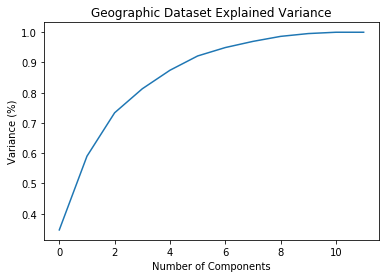

In [17]:
pca_no_au3 = PCA().fit(x)

plt.figure()
plt.plot(np.cumsum(pca_no_au3.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') # For each component
plt.title('Geographic Dataset Explained Variance')
plt.show()

## Use 9 components.

In [18]:
pca_9comps = PCA(n_components = 9)
principal_components3 = pca_9comps.fit_transform(x)

cols = ['PC' + str(i) for i in range(1, 10)]

principal_df3 = pd.DataFrame(data = principal_components3, columns = cols)
principal_df3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,0.446834,-0.023978,-1.055318,1.085349,0.401600,-0.034108,-0.056354,-0.034592,0.057737
1,-0.131905,-0.947202,0.599808,-0.044279,0.371061,0.013722,-0.076814,0.005273,-0.006767
2,-0.507517,0.001420,-0.196574,0.176042,-0.332054,0.175397,-0.285354,0.085185,-0.082509
3,-1.637697,2.956633,0.916489,0.521413,0.024883,0.110699,-0.057478,-0.167851,-0.306300
4,-0.062742,-0.225239,0.077345,-0.687945,0.242929,0.548419,-0.496903,0.092149,0.130463
...,...,...,...,...,...,...,...,...,...
587,-1.103546,1.352946,0.983041,0.260901,-0.273205,0.094485,-0.078659,-0.109042,-0.151024
588,-0.586664,1.309819,-0.194249,0.032104,-0.328587,0.076749,-0.105984,0.110663,-0.180878
589,0.102540,-0.241687,0.138191,0.688913,0.910199,-0.026712,-0.061706,-0.033613,0.054620
590,1.729426,0.161876,-0.037563,-0.240637,0.604628,-0.221075,0.042389,0.070162,0.245111


In [19]:
kmeans = KMeans(n_clusters = k).fit(principal_df3)
principal_df3.loc[:,'cluster'] = kmeans.labels_
principal_df3 = principal_df3
principal_df3

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,cluster
0,0.446834,-0.023978,-1.055318,1.085349,0.401600,-0.034108,-0.056354,-0.034592,0.057737,2
1,-0.131905,-0.947202,0.599808,-0.044279,0.371061,0.013722,-0.076814,0.005273,-0.006767,0
2,-0.507517,0.001420,-0.196574,0.176042,-0.332054,0.175397,-0.285354,0.085185,-0.082509,3
3,-1.637697,2.956633,0.916489,0.521413,0.024883,0.110699,-0.057478,-0.167851,-0.306300,4
4,-0.062742,-0.225239,0.077345,-0.687945,0.242929,0.548419,-0.496903,0.092149,0.130463,0
...,...,...,...,...,...,...,...,...,...,...
587,-1.103546,1.352946,0.983041,0.260901,-0.273205,0.094485,-0.078659,-0.109042,-0.151024,4
588,-0.586664,1.309819,-0.194249,0.032104,-0.328587,0.076749,-0.105984,0.110663,-0.180878,3
589,0.102540,-0.241687,0.138191,0.688913,0.910199,-0.026712,-0.061706,-0.033613,0.054620,2
590,1.729426,0.161876,-0.037563,-0.240637,0.604628,-0.221075,0.042389,0.070162,0.245111,5


In [21]:
geo_cluster_df = pd.DataFrame(list(zip(data['metro_name'], 
                                       geo_cluster_cbsa['Latitude'],
                                       geo_cluster_cbsa['Longitude'],
                                       data['au3'],
                                       principal_df3['cluster'])), 
                              columns = ['metro_name', 'latitude', 'longitude', 'au3', 'pca_cluster'])

fig = px.scatter_mapbox(geo_cluster_df, lat="latitude", lon="longitude", hover_name="metro_name", hover_data = ['pca_cluster', 'au3'],
                        color = 'pca_cluster', zoom=3, color_continuous_scale=px.colors.diverging.Portland, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()




In [22]:
geo_cluster_au3 = pd.DataFrame(list(zip(data['metro_name'], 
                                       geo_cluster_cbsa['Latitude'],
                                       geo_cluster_cbsa['Longitude'],
                                       data['au3'])),
                               columns = ['metro_name', 'latitude', 'longitude', 'au3'])

fig = px.scatter_mapbox(geo_cluster_df, lat="latitude", lon="longitude", hover_name="metro_name", hover_data = ['au3'],
                        color = 'au3', zoom=3, color_continuous_scale=px.colors.diverging.Portland, height=300)
fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()